# Profitable App Profiles for the Google Play and App Store Markets

In this project, the aim is to find app profiles that are profitable on the Google Play Store and the App Store markets. As data analysts in a company that builds Android and iOS apps, our job is to enable the developers to make data-driven decisions on the kind of apps they build.

At the company, we only build apps that are free and so our primary source of revenue is in-app ads. This means that the revenue for any given app depends on the number of users of that app. Hence, the goal of this project is to analyze and gauge what type of apps are more likely to attract users.

# Opening and Exploring the Data

As of October 2020, there are approximately 2.56 million apps on the Google Play Store and 1.85 million apps on the App Store. Collecting data for this huge number of apps require a significant amount of time and money, so we'll analyze a sample of data instead. To refrain from spending resources collecting data ourselves, we should first see whether we can find any relevant existing data that's available at no cost. In our case, there are two data sets that seem suitable for our purpose.

Below are the data sets of mobile apps from the Google Play Store and the App Store found on Kaggle. They can be downloaded through the links below.

* [iOS](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)
* [Android](https://www.kaggle.com/lava18/google-play-store-apps)

Let's start by opening the two data sets and continue with exploring the data.

In [1]:
# import googleplaystore.csv
from csv import reader
open_file = open('googleplaystore.csv', encoding='utf8')
read_file = reader(open_file)
android = list(read_file)
android_header = android[0]
android = android[1:]

# import AppleStore.csv
open_file = open('AppleStore.csv', encoding='utf8')
read_file = reader(open_file)
ios = list(read_file)
ios_header = ios[0]
ios = ios[1:]

We use the `explore_data()` function to go through the data set and print each row. There is also an option to show the number of rows and columns for any data set.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

In [3]:
print(android_header)
print('\n')
explore_data(android,0,3,True)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


Number of rows: 10841
Number of columns: 13


The Google Play Store data set has 10841 rows and 13 columns. The columns that may be useful for analysis are: `App`, `Category`, `Rating`, `Size`, `Installs`, `Price` and `Genres`.

In [4]:
print(ios_header)
print('\n')
explore_data(ios,0,3,True)

['', 'id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0', '188583', '2822', '3.5', '4.5', '5.0.0', '4+', 'Weather', '37', '5', '3', '1']


Number of rows: 7197
Number of columns: 17


The App Store data set has 7197 rows and 17 columns. The columns that may be useful for analysis are: `track_name`, `size_bytes`, `price`, `user_rating` and `prime_genre`.

# Data Cleaning

---

## Deleting Incorrect Data

After exploring the number of rows, columns, and general structure of the data sets, we need to perform data cleaning. The first step is to find for any incorrect data in the data set.

Based on the [discussion](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) at Kaggle, there is one row that has missing data in the Google Play Store data set. The index is 10472 (or 10473 if header is included).

This inconsistency in the data set can be verified by comparing the length of the header and the length of each row. The `for loop` below prints out the row which has length that is not the same as the header.

In [5]:
# to check for incorrect data in Android data set
for row in android:
    if len(row) != len(android_header):
        print(row)
        print(android.index(row))

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']
10472


Let's print out the header and another row to compare and see the discrepancy clearly. 

In [6]:
print(android_header)
print('\n')
print(android[10471])
print('\n')
print(android[10472])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


['Xposed Wi-Fi-Pwd', 'PERSONALIZATION', '3.5', '1042', '404k', '100,000+', 'Free', '0', 'Everyone', 'Personalization', 'August 5, 2014', '3.0.0', '4.0.3 and up']


['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


The row 10472 corresponds to the _Life Made WI-Fi Touchscreen Photo Frame_ app which has the value _1.9_ as category, which is incorrect. Looking at its preceding row, we can deduce that the category for this app is missing. This missing category causes a shift in the row and thus other discrepancies i.e. rating becomes 19 (the maximum rating for a Google Play app is 5). Hence, we'll delete this row.

In [7]:
del android[10472]

In [8]:
# to check for incorrect data in iOS data set
for row in ios:
    if len(row) != len(ios_header):
        print(row)
        print(ios.index(row))

print('No missing data')

No missing data


The same steps are repeated for the App Store data set and no missing data was found.

## Deleting Duplicate Data

### Part One

The next step to data cleaning is to find and delete duplicate entries. This is done so that we don't count apps more than once during analysis.

For this purpose, we make use of two lists:
1. `unique_apps`: stores rows that contain unique app names
2. `duplicate_apps`: stores rows that are duplicates. One instance of each app in this list is in the `unique_apps` list. 

In [9]:
# to check for duplicates in Google Play Store data set
unique_apps = []
duplicate_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
        
print('Number of duplicate apps:', len(duplicate_apps))
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181
Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


The Google Play Store data set has a total of 1181 duplicates. Some examples of the duplicated rows include Google My Business, Google Ads and Slack.

We could randomly remove the duplicate entries. However, it is better to choose the data we keep using a criterion. In the example for Google Ads below, the difference is on the fourth position (`Reviews` column) which has different numbers. This indicates that the data was collected at different times.

Let's use this as a criterion for keeping rows. We will keep the rows with the highest number of reviews because the more the reviews, the more reliable the ratings. 

In [10]:
for app in android:
    name = app[0]
    if name == 'Google Ads':
        print(app)

['Google Ads', 'BUSINESS', '4.3', '29313', '20M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 30, 2018', '1.12.0', '4.0.3 and up']
['Google Ads', 'BUSINESS', '4.3', '29313', '20M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 30, 2018', '1.12.0', '4.0.3 and up']
['Google Ads', 'BUSINESS', '4.3', '29331', '20M', '5,000,000+', 'Free', '0', 'Everyone', 'Business', 'July 30, 2018', '1.12.0', '4.0.3 and up']


To delete the duplicate entries, we will:

1. Create a dictionary where each key is a unique app name, and the value is the highest number of reviews of that app.
2. Use the dictionary to create a new data set, which will only have one entry per app. These apps will have the highest number of reviews.

### Part Two

Let's start by building the dictionary.

In [11]:
reviews_max = {}

for app in android:
    name = app[0] #Google Ads
    n_reviews = float(app[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    
    elif name not in reviews_max:
        reviews_max[name] = n_reviews

In a previous code cell, we found that there are 1181 cases where an app occurs more than once. Hence, the length of the dictionary (unique apps) should be:
>Dictionary = Original Data Set - Duplicate Entries

In [12]:
print('Original Data Set Length:', len(android))
print('Duplicate Entries Length:', len(duplicate_apps))
print('Dictionary Length:', len(android) - len(duplicate_apps))

Original Data Set Length: 10840
Duplicate Entries Length: 1181
Dictionary Length: 9659


Now onto using `reviews_max` to delete the duplicate entries. For the duplicate cases, only entries with the highest number of reviews are retained. In the code cell below:

* We initialize two empty lists: `android_clean` and `already_added`
* We loop through the `android` data set, and for every iteration:
 * The name and number of reviews for the app are isolated
 * The current row (app) is added to `android_clean` list and the app name is added to `already_added` list **IF**:
   * The number of reviews of the current app matches the number of reviews of that app populated in `reviews_max` dictionary; and
   * The name of the app is not already in the `already_added` list. We need this supplementary condition to cater for cases where the highest number of reviews of a duplicate app is the same for more than one entry. For example, the Box app has three entries and all have the same number of reviews. If we just check for `n_reviews == reviews_max[name]`, we'll still end up with duplicate entries for some apps.

In [13]:
android_clean = []
already_added = []

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if (n_reviews == reviews_max[name]) and (name not in already_added):
        android_clean.append(app)
        already_added.append(name)

To confirm that the number of rows is 9659, we'll use `explore_data()` function. 

In [14]:
explore_data(android_clean, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9659
Number of columns: 13


We have 9659 rows, just as expected.

## Removing Non-English Apps

### Part One

At the company, we'd like to analyze only apps catered to an English-speaking audience. However, in the data sets, it's found that there are apps with names that suggest they are not for English-speaking users. Below are a few examples from both data sets:

In [15]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

436672029
1144164707
中国語 AQリスニング
لعبة تقدر تربح DZ


Since we're not interested in these apps, we'll remove them. One way to do this is to remove apps whose name contains characters that are not commonly used in English. English text usually utilizes letters from the English alphabet (A-Z), numbers (0-9), punctuation marks (such as ., !, ? and ;) and other symbols (+, /, etc.).

These characters that are specific to English texts are encoded using the [ASCII standard](https://theasciicode.com.ar/). Each ASCII character has a corresponding number between 0 and 127 associated with it. We can take advantage of this to build a function to find out the corresponding number of each character and determine if an app has non-English characters.

The function below makes use of the `ord()` built-in function to find out the ASCII number for each character.

In [16]:
def is_english(app_name):
    for letter in app_name:
        if ord(letter) > 127:
            return False
    # return True must be in 'for loop' and not 'else' clause to check WHOLE string is English
    return True 

print(is_english('Instagram'))
print(is_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))

True
False


The function seems to work fine, but some English apps have emojis or other symbols (™, — (em dash), – (en dash), etc.) in their names. These characters fall outside of the 0 to 127 ASCII range and thus can cause useful apps row to be removed with the above `is_english()` function.

### Part Two

To minimize the impact of data loss, we'll only remove apps that have more than three non-standard ASCII characters.

In [17]:
def is_english(app_name):
    non_ascii = 0
    
    for letter in app_name:
        if ord(letter) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True
    
print(is_english('Docs To Go™ Free Office Suite'))
print(is_english('Instachat 😜'))

True
True


The function above may not be perfect and a few non-English apps could still get past the filter, but it should be good enough at this point for our analysis.

Below, we use the optimized `is_english()` function to filter non-English apps from both data sets and add the English ones to two separate lists.

In [18]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if is_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[2]
    if is_english(name):
        ios_english.append(app)
        
print(explore_data(android_english, 0, 3, True))
print('\n')
print(explore_data(ios_english, 0, 3, True))

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


Number of rows: 9614
Number of columns: 13
None


['1', '281656475', 'PAC-MAN Premium', '100788224', 'USD', '3.99', '21292', '26', '4', '4.5', '6.3.5', '4+', 'Games', '38', '5', '10', '1']


['2', '281796108', 'Evernote - stay organized', '158578688', 'USD', '0', '161065', '26', '4', '3.5', '8.2.2', '4+', 'Productivity', '37', '5', '23', '1']


['3', '281940292', 'WeatherBug - Local Weather, Radar, Maps, Alerts', '100524032', 'USD', '0',

We can see that we're left with 9614 Android apps and 6183 iOS apps.

## Isolating Free Apps

As mentioned previously, the company only build apps that are free to download and install, and the main source of revenue is from in-app ads. Currently, the data sets contain both free and non-free apps and so we need to isolate the free apps for analysis.

This will be the last steps in the data cleaning process.

In [29]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    #solution notebook: price = app[4]
    price = app[5] 
    if price == '0':
        ios_final.append(app)

print(len(android_final))
print(len(ios_final))

8864
3222


We're left with 8864 Android apps and 3222 iOS apps which should be enough for our analysis.

# Analysis

---

## Most Common Apps by Genre

### Part One

As mentioned, our aim is to determine the kinds of apps that are likely to attract more users because the revenue is highly influenced by the number of people using the apps.

To minimize risks and overhead, the validation strategy for an app idea comprises of three steps:
1. Build a minimal Android version of the app, and add it to Google Play Store.
2. If the app has good response from users, we develop it further.
3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.

Because our end goal is to add the app on both Google Play Store and the App Store, we need to find app profiles that are successful on both markets. For instance, a profile that works well for both markets might be a productivity app that makes use of gamification.

Let's begin the analysis by exploring the common genres for each market. For this, we'll need to build frequency tables for:
1. Columns `Category` and `Genres` of the Google Play Store data set, and
2. Column `prime_genre` of the App Store data set

### Part Two

We'll build two functions to analyze the frequency tables:
* `freq_table()` function to generate frequency tables that show percentages
* `display_table()` function to display the percentages in descending order

In [27]:
# generate frequency table displaying percentages
def freq_table(dataset, index):
    frequency_table = {}
    total_number_of_apps = 0
    
    for app in dataset:
        total_number_of_apps += 1
        genre = app[index]
        
        if genre in frequency_table:
            frequency_table[genre] += 1
        else:
            frequency_table[genre] = 1
            
    frequency_table_percentages = {}
    
    for key in frequency_table:
        percentage = (frequency_table[key] / total_number_of_apps) * 100
        frequency_table_percentages[key] = percentage
    
    return frequency_table_percentages  

# display frequency table (percentages) in descending order
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse = True)
    
    for entry in table_sorted:
        print(entry[1], ':', entry[0])    

### Part Three

We start by examining the frequency table for the `prime_genre` column of the App Store data set.

In [30]:
display_table(ios_final, 12)

Games : 58.16263190564867
Entertainment : 7.883302296710118
Photo & Video : 4.9658597144630665
Education : 3.662321539416512
Social Networking : 3.2898820608317814
Shopping : 2.60707635009311
Utilities : 2.5139664804469275
Sports : 2.1415270018621975
Music : 2.0484171322160147
Health & Fitness : 2.0173805090006205
Productivity : 1.7380509000620732
Lifestyle : 1.5828677839851024
News : 1.3345747982619491
Travel : 1.2414649286157666
Finance : 1.1173184357541899
Weather : 0.8690254500310366
Food & Drink : 0.8069522036002483
Reference : 0.5586592178770949
Business : 0.5276225946617008
Book : 0.4345127250155183
Navigation : 0.186219739292365
Medical : 0.186219739292365
Catalogs : 0.12414649286157665


We can see that among the free English apps, more than half (58.16%) are games. Entertainment apps come second with close to 8%, followed by photo and video apps, which are close to 5%. Only 3.66% of the apps are designed for education, followed by social networking apps which amount for about 3.3% of the apps in our data set.

The general observation is that the App Store (at least the segment for free English apps) is mostly dominated by apps that are designed for fun (games, entertainment, photo and video, social networking, sports, music, etc.) while apps with practical purposes (education, shopping, utilities, health and fitness, productivity, etc.) are more rare. Having said that, the fact that fun apps are larger in number doesn't necessarily imply that they also have the greatest number of users - the demand might not be the same as the offer.

Let's continue by examining the `Category` and `Genres` columns of the Google Play Store data set. These two columns seem to be related.

In [32]:
display_table(android_final, 1) # Category

FAMILY : 18.907942238267147
GAME : 9.724729241877256
TOOLS : 8.461191335740072
BUSINESS : 4.591606498194946
LIFESTYLE : 3.9034296028880866
PRODUCTIVITY : 3.892148014440433
FINANCE : 3.7003610108303246
MEDICAL : 3.531137184115524
SPORTS : 3.395758122743682
PERSONALIZATION : 3.3167870036101084
COMMUNICATION : 3.2378158844765346
HEALTH_AND_FITNESS : 3.0798736462093865
PHOTOGRAPHY : 2.944494584837545
NEWS_AND_MAGAZINES : 2.7978339350180503
SOCIAL : 2.6624548736462095
TRAVEL_AND_LOCAL : 2.33528880866426
SHOPPING : 2.2450361010830324
BOOKS_AND_REFERENCE : 2.1435018050541514
DATING : 1.861462093862816
VIDEO_PLAYERS : 1.7937725631768955
MAPS_AND_NAVIGATION : 1.3989169675090252
FOOD_AND_DRINK : 1.2409747292418771
EDUCATION : 1.1620036101083033
ENTERTAINMENT : 0.9589350180505415
LIBRARIES_AND_DEMO : 0.9363718411552346
AUTO_AND_VEHICLES : 0.9250902527075812
HOUSE_AND_HOME : 0.8235559566787004
WEATHER : 0.8009927797833934
EVENTS : 0.7107400722021661
PARENTING : 0.6543321299638989
ART_AND_DESIGN : 

The outlook is significantly different on the Google Play Store; there are not as many apps designed for fun, and it seems that a good number of apps are designed for practical purposes (family, tools, business, lifestyle, productivity, etc.). However, if we investigate further, we can see that the family category (which accounts for almost 19% of the apps) represents mostly games for kids.

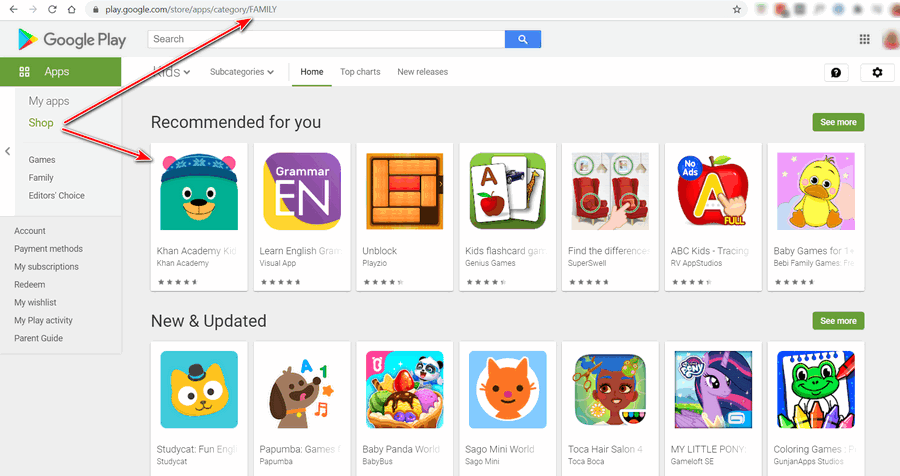

Even so, pratical apps seem to have a better representation on Google Play Store compared to the App Store. This scenario is also confirmed by the frequency table we see for the `Genres` column.

In [35]:
display_table(android_final, 9) # Genres

Tools : 8.449909747292418
Entertainment : 6.069494584837545
Education : 5.347472924187725
Business : 4.591606498194946
Productivity : 3.892148014440433
Lifestyle : 3.892148014440433
Finance : 3.7003610108303246
Medical : 3.531137184115524
Sports : 3.463447653429603
Personalization : 3.3167870036101084
Communication : 3.2378158844765346
Action : 3.1024368231046933
Health & Fitness : 3.0798736462093865
Photography : 2.944494584837545
News & Magazines : 2.7978339350180503
Social : 2.6624548736462095
Travel & Local : 2.3240072202166067
Shopping : 2.2450361010830324
Books & Reference : 2.1435018050541514
Simulation : 2.0419675090252705
Dating : 1.861462093862816
Arcade : 1.8501805054151623
Video Players & Editors : 1.7712093862815883
Casual : 1.7599277978339352
Maps & Navigation : 1.3989169675090252
Food & Drink : 1.2409747292418771
Puzzle : 1.128158844765343
Racing : 0.9927797833935018
Role Playing : 0.9363718411552346
Libraries & Demo : 0.9363718411552346
Auto & Vehicles : 0.9250902527075

The difference between the `Category` and `Genres` columns are not obvious, but one noticable aspect is that the `Genres` column is much more granular and it has more categories. As we're only looking at the bigger picture, we'll only work with the `Category` column moving forward.

Up to this point, the findings show that the App Store is dominated by apps designed for fun, while the Google Play Store has a more balanced landscape for both practical and fun apps. Now we'd like to inspect on the kind of apps that have most users.

## Most Popular Apps by Genre on the App Store 